# Clasificacion de hongos

## Analisis y manipulacion de datos 

In [1]:
import os
import pandas as pd 

# Leer el archivo
df = pd.read_csv( '../Hongos-20220225/data.csv', header=None)
df.head()


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS


In [2]:
# Renombrar las columnas del data frame 
df = df.rename(columns={0: "class", 1: "cap-shape", 2: "cap-surface", 3: "cap-color", 4: "bruises?", 5: "odor", 6: "gill-attachment", 7: "gill-spacing", 8: "gill-size", 9: "gill-color", 10: "stalk-shape", 11: "stalk-root", 12: "stalk-surface-above-ring", 13: "stalk-surface-below-ring", 14: "stalk-color-above-ring", 15: "stalk-color-below-ring", 16: "veil-type", 17: "veil-color", 18: "ring-number", 19: "ring-type", 20: "spore-print-color", 21: "population", 22: "habitat"})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8416 entries, 0 to 8415
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8416 non-null   object
 1   cap-shape                 8416 non-null   object
 2   cap-surface               8416 non-null   object
 3   cap-color                 8416 non-null   object
 4   bruises?                  8416 non-null   object
 5   odor                      8416 non-null   object
 6   gill-attachment           8416 non-null   object
 7   gill-spacing              8416 non-null   object
 8   gill-size                 8416 non-null   object
 9   gill-color                8416 non-null   object
 10  stalk-shape               8416 non-null   object
 11  stalk-root                8416 non-null   object
 12  stalk-surface-above-ring  8416 non-null   object
 13  stalk-surface-below-ring  8416 non-null   object
 14  stalk-color-above-ring  

In [3]:
# Resumen de los datos y sus atributos
df2 = df.describe()

df2

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,...,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,EDIBLE,CONVEX,SCALY,BROWN,NO,NONE,FREE,CLOSE,BROAD,BUFF,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,WHITE,SEVERAL,WOODS
freq,4488,3796,3268,2320,5040,3808,8200,6824,5880,1728,...,5076,4744,4640,8416,8216,7768,3968,2424,4064,3160


In [4]:
# Confirmar que una de las columnas posee solo un valor 
df2.loc["unique"] > 1

class                        True
cap-shape                    True
cap-surface                  True
cap-color                    True
bruises?                     True
odor                         True
gill-attachment              True
gill-spacing                 True
gill-size                    True
gill-color                   True
stalk-shape                  True
stalk-root                   True
stalk-surface-above-ring     True
stalk-surface-below-ring     True
stalk-color-above-ring       True
stalk-color-below-ring       True
veil-type                   False
veil-color                   True
ring-number                  True
ring-type                    True
spore-print-color            True
population                   True
habitat                      True
Name: unique, dtype: bool

In [5]:
# Identificar valores nulos
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises?                    0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
df = df.astype('category')
df.dtypes

# Using LabelEncoder to convert category values to ordinal
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])




In [7]:
# Eliminar atributo no significativo
df = df.drop(["veil-type"],axis=1)

In [8]:
# Confirmar la informacion final
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8416 entries, 0 to 8415
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8416 non-null   int64
 1   cap-shape                 8416 non-null   int64
 2   cap-surface               8416 non-null   int64
 3   cap-color                 8416 non-null   int64
 4   bruises?                  8416 non-null   int64
 5   odor                      8416 non-null   int64
 6   gill-attachment           8416 non-null   int64
 7   gill-spacing              8416 non-null   int64
 8   gill-size                 8416 non-null   int64
 9   gill-color                8416 non-null   int64
 10  stalk-shape               8416 non-null   int64
 11  stalk-root                8416 non-null   int64
 12  stalk-surface-above-ring  8416 non-null   int64
 13  stalk-surface-below-ring  8416 non-null   int64
 14  stalk-color-above-ring    8416 non-null 

In [9]:
# Preparacion de los datos 
from sklearn.model_selection import train_test_split

# Columna "class" convertida en un arreglo de numpy.
y = df["class"].values

# Se conservan todos los datos excepto la columna "class".
X = df.drop(["class"], axis=1).values

# Dividir el dataset para entrenamiento y prediccion.
X_training, X_prediction, y_training, y_prediction = train_test_split(X, y, test_size=0.05, random_state=0)

# Dividir el dataset para entrenamiento y test.
X_train, X_test, y_train, y_test = train_test_split(X_training, y_training, test_size=0.30, random_state=0)



In [10]:
# Imprimir las longitudes de los conjuntos finales
print(len(X_training))
print(len(X_prediction))
print(len(X_train))
print(len(X_test))

7995
421
5596
2399


## Entrenamiento y validacion del modelo

In [11]:
from sklearn.neighbors import KNeighborsClassifier

# Clasificación K Nearest neighbors 
k = 1

# Definición del clasificador
classifier = KNeighborsClassifier(n_neighbors=k)

# Entrenamiento del clasificador con lo datos de entrenamiento y valores de clase para cada ejemplo
classifier.fit(X_train, y_train)

# Predicción con el clasificador entrenado en los datos de evaluación 
y_validation = classifier.predict(X_test)
y_validation

array([1, 1, 1, ..., 0, 1, 0])

In [12]:
# Medidas de rendimiento del clasificador
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("Accuracy: {}".format(accuracy_score(y_test, y_validation)))
print("Precision: {}".format(precision_score(y_test, y_validation, average="macro")))
print("Recall: {}".format(recall_score(y_test, y_validation, average="macro")))
print("F-score: {}".format(f1_score(y_test, y_validation, average="macro")))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F-score: 1.0


In [13]:
from sklearn.metrics import classification_report

target_names = ['Edible', 'Poisonous']
print(classification_report(y_test, y_validation, target_names=target_names))

              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00      1272
   Poisonous       1.00      1.00      1.00      1127

    accuracy                           1.00      2399
   macro avg       1.00      1.00      1.00      2399
weighted avg       1.00      1.00      1.00      2399



[[1272    0]
 [   0 1127]]


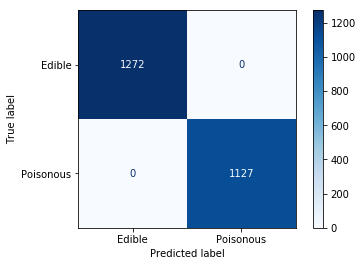

In [17]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

print(confusion_matrix(y_test, y_validation))
plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues, 
                      display_labels=['Edible', 'Poisonous'])  

## Prediccion con datos nuevos

In [15]:
# Predicción con el clasificador entrenado
y_prediction_results = classifier.predict(X_prediction)
y_prediction_results

array([1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,

[[208   0]
 [  0 213]]


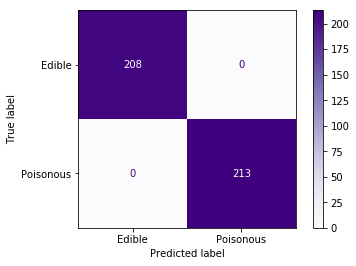

In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

print(confusion_matrix(y_prediction, y_prediction_results))
plot_confusion_matrix(classifier, X_prediction, y_prediction, cmap=plt.cm.Purples, 
                      display_labels=['Edible', 'Poisonous'])